Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('heart_disease.csv')
print(df.head())

   Age  Gender  Cholesterol Blood Pressure  Heart Disease
0   68    Male          188         162/66              0
1   58    Male          231         134/91              1
2   44    Male          249         145/91              1
3   72  Female          151        173/112              0
4   37    Male          226         171/84              0


In [4]:
print('\n Missing values')
df.isnull().sum()



 Missing values


Age               0
Gender            0
Cholesterol       0
Blood Pressure    0
Heart Disease     0
dtype: int64

Training samples: 800, Testing samples: 200
Model Accuracy: 0.60

Confusion Matrix
[[121   0]
 [ 79   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       121
           1       0.00      0.00      0.00        79

    accuracy                           0.60       200
   macro avg       0.30      0.50      0.38       200
weighted avg       0.37      0.60      0.46       200



c:\Users\omshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\omshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\omshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

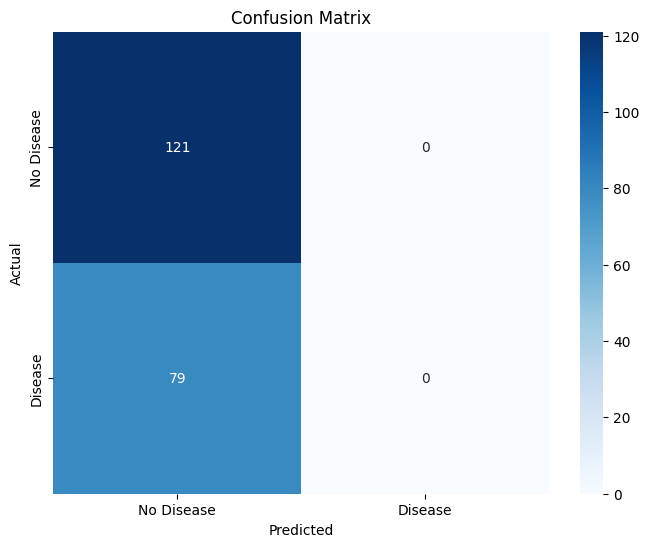

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("heart_disease.csv")

# Encode 'Gender' column
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])  # 'Male' -> 1, 'Female' -> 0

# Split 'Blood Pressure' into two separate columns
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Drop original 'Blood Pressure' column
df = df.drop(columns=['Blood Pressure'])

# Define features and target
X = df.drop(columns=["Heart Disease"])
y = df["Heart Disease"]

# Standardize only numerical columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f'Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}')

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

# Evaluate model performance
cm = confusion_matrix(y_test, y_pred)

print('\nConfusion Matrix')
print(cm)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
